# Open Exploration

## Global Sensitivity Analysis

In [20]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

from ema_workbench import (Model, RealParameter, TimeSeriesOutcome,
                           perform_experiments, ema_logging,Policy)

from ema_workbench import Samplers

from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis.scenario_discovery_util import RuleInductionType
from ema_workbench.em_framework.salib_samplers import get_SALib_problem

from SALib.analyze import sobol


from problem_formulation import get_model_for_problem_formulation

from dike_model_function import DikeNetwork  # @UnresolvedImport


from ema_workbench import (Model, CategoricalParameter,ScalarOutcome, IntegerParameter, RealParameter,
                           MultiprocessingEvaluator, ema_logging, Constant, Policy, Scenario,
                           perform_experiments, SequentialEvaluator,Constraint)

In [21]:
#running the model through EMA workbench
ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(3) 


In [95]:
len(dike_model.uncertainties)

19

## Sobol

In [56]:
for keys in outcomes.keys():
    experiments[keys] = outcomes[keys]

In [59]:
experiments.to_csv("sobol.csv")

In [29]:
problem = get_SALib_problem(dike_model.uncertainties)
print(problem)

{'num_vars': 19, 'names': ['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail', 'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate', 'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax', 'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1', 'discount rate 2'], 'bounds': [(0, 133), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (0, 4), (0, 4), (0, 4)]}


In [24]:
with SequentialEvaluator(dike_model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=320, policies=1, uncertainty_sampling=Samplers.SOBOL)

    
for keys in outcomes.keys():
    experiments[keys] = outcomes[keys]
    
experiments.to_csv("outcomes_sobol.csv")

C:\Users\Willemijn Tutuarima\miniconda3\envs\gds\lib\site-packages\SALib\sample\saltelli.py:94: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (320) is equal to `2^n`.
        
  warnings.warn(msg)
[MainProcess/INFO] performing 12800 scenarios * 1 policies * 1 model(s) = 12800 experiments
100%|██████████████████████████████████| 12800/12800 [6:37:52<00:00,  1.87s/it]
[MainProcess/INFO] experiments finished


In [45]:
experiments['Expected Evacuation Costs']

0           0.000000
1          59.716115
2           0.000000
3           0.000000
4           0.000000
            ...     
12795    1935.238989
12796    1935.238989
12797    1935.238989
12798    1935.238989
12799    1935.238989
Name: Expected Evacuation Costs, Length: 12800, dtype: float64

In [50]:
outcomes_of_interest = ['A.4_Expected Annual Damage', 'A.4_Expected Number of Deaths', 'Expected Evacuation Costs']

                               ST   ST_conf
A.0_ID flood wave shape  0.007820  0.016962
A.1_Bmax                 0.000000  0.000000
A.1_Brate                0.000000  0.000000
A.1_pfail                0.000231  0.000739
A.2_Bmax                 0.000000  0.000000
A.2_Brate                0.000000  0.000000
A.2_pfail                0.033461  0.069113
A.3_Bmax                 0.000000  0.000000
A.3_Brate                0.000000  0.000000
A.3_pfail                0.000000  0.000000
A.4_Bmax                 0.000000  0.000000
A.4_Brate                0.000000  0.000000
A.4_pfail                1.343967  0.940603
A.5_Bmax                 0.000000  0.000000
A.5_Brate                0.000000  0.000000
A.5_pfail                0.000000  0.000000
discount rate 0          0.023437  0.019897
discount rate 1          0.000149  0.000334
discount rate 2          0.000000  0.000000
                               S1   S1_conf
A.0_ID flood wave shape  0.002221  0.004233
A.1_Bmax                 0.00000

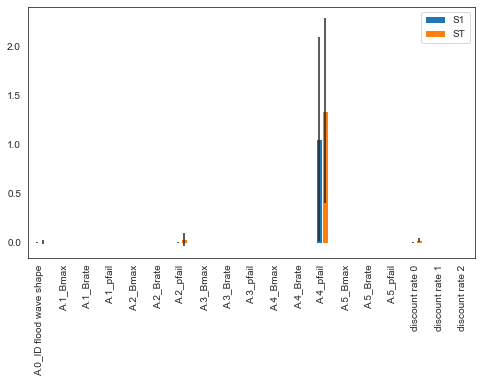

In [52]:
Si = sobol.analyze(problem, outcomes[outcomes_of_interest[0]], calc_second_order=True, print_to_console=True)

Si_filter = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(Si_filter, index=problem['names'])

sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(8,6)
fig.subplots_adjust(bottom=0.3)
plt.show()

In [53]:
indices

,S1,ST
A.0_ID flood wave shape,0.002221,0.007820
A.1_Bmax,0.000000,0.000000
A.1_Brate,0.000000,0.000000
A.1_pfail,-0.000193,0.000231
A.2_Bmax,0.000000,0.000000
A.2_Brate,0.000000,0.000000
A.2_pfail,0.002116,0.033461
A.3_Bmax,0.000000,0.000000
A.3_Brate,0.000000,0.000000
A.3_pfail,0.000000,0.000000


                               ST   ST_conf
A.0_ID flood wave shape  0.009411  0.015045
A.1_Bmax                 0.000000  0.000000
A.1_Brate                0.000000  0.000000
A.1_pfail                0.000601  0.001845
A.2_Bmax                 0.000000  0.000000
A.2_Brate                0.000000  0.000000
A.2_pfail                0.033106  0.057585
A.3_Bmax                 0.000000  0.000000
A.3_Brate                0.000000  0.000000
A.3_pfail                0.000000  0.000000
A.4_Bmax                 0.000000  0.000000
A.4_Brate                0.000000  0.000000
A.4_pfail                1.058313  0.227867
A.5_Bmax                 0.000000  0.000000
A.5_Brate                0.000000  0.000000
A.5_pfail                0.000000  0.000000
discount rate 0          0.000000  0.000000
discount rate 1          0.000000  0.000000
discount rate 2          0.000000  0.000000
                               S1   S1_conf
A.0_ID flood wave shape  0.002673  0.004057
A.1_Bmax                 0.00000

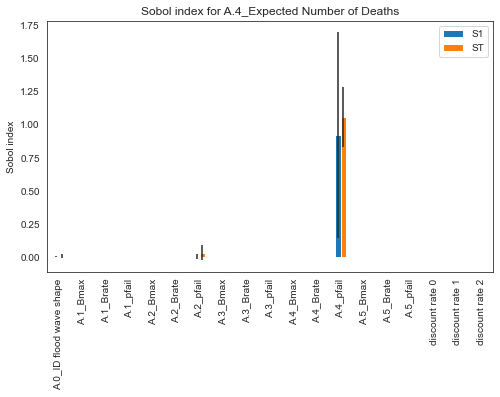

                               S1        ST
A.0_ID flood wave shape  0.002673  0.009411
A.1_Bmax                 0.000000  0.000000
A.1_Brate                0.000000  0.000000
A.1_pfail               -0.000315  0.000601
A.2_Bmax                 0.000000  0.000000
A.2_Brate                0.000000  0.000000
A.2_pfail                0.005564  0.033106
A.3_Bmax                 0.000000  0.000000
A.3_Brate                0.000000  0.000000
A.3_pfail                0.000000  0.000000
A.4_Bmax                 0.000000  0.000000
A.4_Brate                0.000000  0.000000
A.4_pfail                0.922633  1.058313
A.5_Bmax                 0.000000  0.000000
A.5_Brate                0.000000  0.000000
A.5_pfail                0.000000  0.000000
discount rate 0          0.000000  0.000000
discount rate 1          0.000000  0.000000
discount rate 2          0.000000  0.000000


In [59]:
Si = sobol.analyze(problem, outcomes[outcomes_of_interest[1]], calc_second_order=True, print_to_console=True)

Si_filter = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(Si_filter, index=problem['names'])

sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(8,6)
fig.subplots_adjust(bottom=0.3)
plt.title("Sobol index for A.4_Expected Number of Deaths")
plt.ylabel('Sobol index') 
plt.show()

print(indices)

fig.savefig('sobol_deaths.png', dpi=fig.dpi)

                                   ST       ST_conf
A.0_ID flood wave shape  9.561381e-03  1.048658e-02
A.1_Bmax                 4.137423e-05  9.718741e-05
A.1_Brate                0.000000e+00  0.000000e+00
A.1_pfail                4.964108e-02  5.501774e-02
A.2_Bmax                 3.304703e-07  7.454646e-07
A.2_Brate                5.847580e-06  1.319079e-05
A.2_pfail                9.544606e-01  1.044691e-01
A.3_Bmax                 0.000000e+00  0.000000e+00
A.3_Brate                0.000000e+00  0.000000e+00
A.3_pfail                6.751805e-06  1.506039e-05
A.4_Bmax                 0.000000e+00  0.000000e+00
A.4_Brate                0.000000e+00  0.000000e+00
A.4_pfail                6.529298e-04  5.884246e-04
A.5_Bmax                 0.000000e+00  0.000000e+00
A.5_Brate                0.000000e+00  0.000000e+00
A.5_pfail                8.102247e-04  1.120171e-03
discount rate 0          0.000000e+00  0.000000e+00
discount rate 1          0.000000e+00  0.000000e+00
discount rat

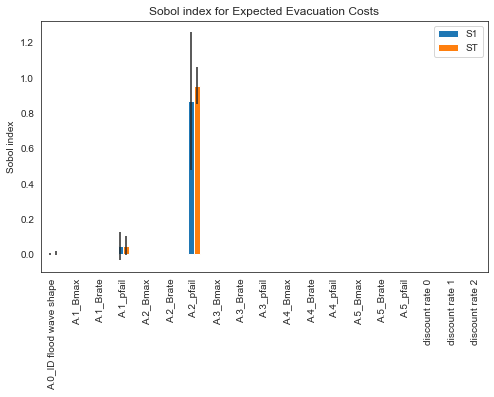

                               S1            ST
A.0_ID flood wave shape  0.000427  9.561381e-03
A.1_Bmax                -0.000131  4.137423e-05
A.1_Brate                0.000000  0.000000e+00
A.1_pfail                0.046614  4.964108e-02
A.2_Bmax                -0.000007  3.304703e-07
A.2_Brate                0.000030  5.847580e-06
A.2_pfail                0.868576  9.544606e-01
A.3_Bmax                 0.000000  0.000000e+00
A.3_Brate                0.000000  0.000000e+00
A.3_pfail               -0.000053  6.751805e-06
A.4_Bmax                 0.000000  0.000000e+00
A.4_Brate                0.000000  0.000000e+00
A.4_pfail                0.001966  6.529298e-04
A.5_Bmax                 0.000000  0.000000e+00
A.5_Brate                0.000000  0.000000e+00
A.5_pfail                0.000141  8.102247e-04
discount rate 0          0.000000  0.000000e+00
discount rate 1          0.000000  0.000000e+00
discount rate 2          0.000000  0.000000e+00


In [60]:
Si = sobol.analyze(problem, outcomes[outcomes_of_interest[2]], calc_second_order=True, print_to_console=True)

Si_filter = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(Si_filter, index=problem['names'])

sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(8,6)
fig.subplots_adjust(bottom=0.3)
plt.title("Sobol index for Expected Evacuation Costs")
plt.ylabel('Sobol index') 
plt.show()

print(indices)

fig.savefig('sobol_evacuation.png', dpi=fig.dpi)

In [10]:
for keys in outcomes2.keys():
    experiments2[keys] = outcomes2[keys]

In [15]:
experiments2.columns

Index(['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2', '0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'EWS_DaysToThreat', 'scenario', 'policy', 'model',
       'A.1_Expected Annual Damage', 'A.1_Dike Investment Costs',
       'A.1_Expected Nu

In [23]:
(experiments2['A.0_ID flood wave shape'] == experiments['A.0_ID flood wave shape']).describe()

count       80
unique       1
top       True
freq        80
Name: A.0_ID flood wave shape, dtype: object

In [21]:
experiments['A.0_ID flood wave shape'].tail()

75    70
76    70
77    70
78    70
79    70
Name: A.0_ID flood wave shape, dtype: int32

In [5]:
outcomes_of_interest = ['A.4_Expected Annual Damage', 'A.4_Dike Investment Costs', 'A.4_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs']

                                   ST   ST_conf
A.0_ID flood wave shape  1.944630e-02  0.048116
A.1_Bmax                 0.000000e+00  0.000000
A.1_Brate                0.000000e+00  0.000000
A.1_pfail                0.000000e+00  0.000000
A.2_Bmax                 5.721209e-04  0.000611
A.2_Brate                4.402912e-08  0.000001
A.2_pfail                6.124122e-01  0.577694
A.3_Bmax                 3.720006e-03  0.012886
A.3_Brate                0.000000e+00  0.000000
A.3_pfail                1.004053e-03  0.017952
A.4_Bmax                 0.000000e+00  0.000000
A.4_Brate                0.000000e+00  0.000000
A.4_pfail                4.193921e-02  0.278835
A.5_Bmax                 0.000000e+00  0.000000
A.5_Brate                0.000000e+00  0.000000
A.5_pfail                1.592716e-01  0.502471
discount rate 0          0.000000e+00  0.000000
discount rate 1          0.000000e+00  0.000000
discount rate 2          0.000000e+00  0.000000
                               S1   S1_c

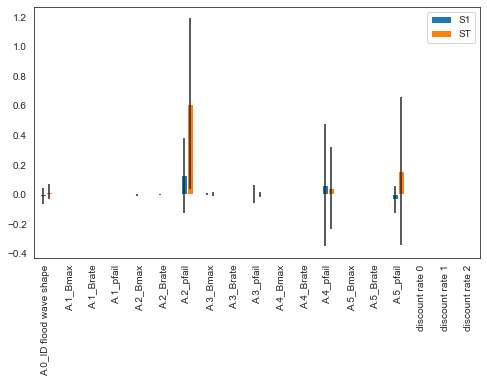

In [40]:
Si = sobol.analyze(problem, outcomes[outcomes_of_interest[4]], calc_second_order=True, print_to_console=True)

Si_filter = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(Si_filter, index=problem['names'])

sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(8,6)
fig.subplots_adjust(bottom=0.3)
plt.show()

In [42]:
Y = outcomes[outcomes_of_interest[4]]

s_data = pd.DataFrame(index=problem['names'],
                      columns=np.arange(20,n_exp,50)*(2*problem['num_vars']+2))
for j in s_data.columns:
    scores = sobol.analyze(problem, Y[0:j], calc_second_order=True, print_to_console=False)
    s_data.loc[:,j] = scores['ST']

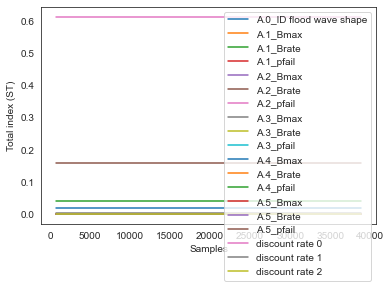

In [43]:
fig, ax = plt.subplots(1)

s_data.T.plot(ax=ax)
ax.set_xlabel('Samples')
ax.set_ylabel('Total index (ST)')
plt.show()

## Random Forest Extra Forest

In [2]:
experiments_tree = pd.read_csv('df_experiments_s1000_p10.csv')
outcomes_tree = pd.read_csv('df_outcomes_s1000_p10.csv')

In [3]:
outcomes_tree

,Unnamed: 0,A.1_Expected Annual Damage,A.1_Dike Investment Costs,A.1_Expected Number of Deaths,A.2_Expected Annual Damage,A.2_Dike Investment Costs,A.2_Expected Number of Deaths,A.3_Expected Annual Damage,A.3_Dike Investment Costs,A.3_Expected Number of Deaths,A.4_Expected Annual Damage,A.4_Dike Investment Costs,A.4_Expected Number of Deaths,A.5_Expected Annual Damage,A.5_Dike Investment Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,0,0.000000e+00,1.105736e+08,0.000000,1.075564e+07,2.059790e+08,0.002289,0.000000e+00,6.911389e+07,0.000000,0.000000,5.092648e+07,0.000000,0.0,2.015526e+08,0.0,935800000.0,699.603995
1,1,0.000000e+00,1.105736e+08,0.000000,1.768341e+08,2.059790e+08,0.033865,0.000000e+00,6.911389e+07,0.000000,0.000000,5.092648e+07,0.000000,0.0,2.015526e+08,0.0,935800000.0,12069.428853
2,2,0.000000e+00,1.105736e+08,0.000000,3.051443e+07,2.059790e+08,0.006264,6.857413e+06,6.911389e+07,0.002293,0.000000,5.092648e+07,0.000000,0.0,2.015526e+08,0.0,935800000.0,2303.351644
3,3,0.000000e+00,1.105736e+08,0.000000,1.309610e+07,2.059790e+08,0.001826,4.610649e+07,6.911389e+07,0.010180,0.000000,5.092648e+07,0.000000,0.0,2.015526e+08,0.0,935800000.0,1891.226906
4,4,0.000000e+00,1.105736e+08,0.000000,6.869667e+07,2.059790e+08,0.007141,3.814550e+06,6.911389e+07,0.001031,0.000000,5.092648e+07,0.000000,0.0,2.015526e+08,0.0,935800000.0,2401.776247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,3.093545e+06,6.650701e+07,0.000366,0.000000e+00,2.354086e+08,0.000000,0.000000e+00,1.437793e+08,0.000000,0.000000,4.275558e+07,0.000000,0.0,1.433328e+08,0.0,991100000.0,54.563445
9996,9996,1.106546e+07,6.650701e+07,0.001039,0.000000e+00,2.354086e+08,0.000000,0.000000e+00,1.437793e+08,0.000000,0.000000,4.275558e+07,0.000000,0.0,1.433328e+08,0.0,991100000.0,178.758766
9997,9997,0.000000e+00,6.650701e+07,0.000000,0.000000e+00,2.354086e+08,0.000000,0.000000e+00,1.437793e+08,0.000000,489854.336235,4.275558e+07,0.000029,0.0,1.433328e+08,0.0,991100000.0,39.519762
9998,9998,1.818283e+08,6.650701e+07,0.014109,0.000000e+00,2.354086e+08,0.000000,0.000000e+00,1.437793e+08,0.000000,0.000000,4.275558e+07,0.000000,0.0,1.433328e+08,0.0,991100000.0,2439.067861


In [81]:
scores = feature_scoring.get_ex_feature_scores(experiments_tree, outcomes_tree[outcomes_of_interest],
                                      max_features=0.6, mode=RuleInductionType.REGRESSION)[0]
scores

[MainProcess/INFO] model dropped from analysis because only a single category


,1
0,
A.4_pfail,0.590513
A.2_DikeIncrease 1,0.030768
A.3_pfail,0.028977
A.4_DikeIncrease 0,0.028380
0_RfR 0,0.025033
1_RfR 1,0.022958
A.1_DikeIncrease 0,0.017437
discount rate 1,0.015868
discount rate 0,0.015819


In [93]:
scores.loc[experiment_columns].sort_values(by=9900)

,9900
0,
A.2_Brate,0.006296
A.4_Bmax,0.006791
A.5_pfail,0.006887
A.4_Brate,0.007096
A.0_ID flood wave shape,0.007231
A.2_Bmax,0.007892
A.5_Brate,0.007895
A.3_Brate,0.008014
A.5_Bmax,0.008206


In [82]:
combined_scores = []
for j in range(100, experiments_tree.shape[0], 100):
    scores = feature_scoring.get_ex_feature_scores(experiments_tree.iloc[0:j, :],
                                                   outcomes_tree[outcomes_of_interest][0:j],
                                                   max_features=0.6,
                                                   mode=RuleInductionType.REGRESSION)[0]
    scores.columns = [j]
    combined_scores.append(scores)

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a si

In [83]:
combined_scores = pd.concat(combined_scores, axis=1, sort=True)

In [8]:

experiment_columns = ['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2'] 

policy_columns = ['0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'EWS_DaysToThreat',]

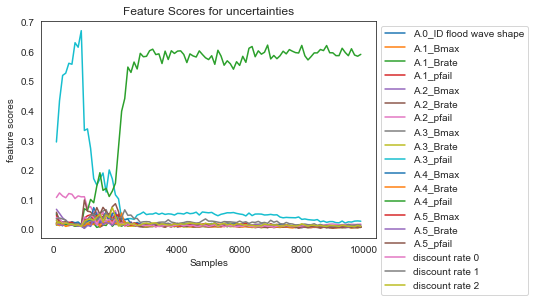

In [85]:
fig, ax = plt.subplots(1)

combined_scores.T[experiment_columns].plot(ax=ax)
ax.legend(bbox_to_anchor=(1,1))
ax.set_xlabel('Samples')
ax.set_ylabel('feature scores')
plt.title('Feature Scores for uncertainties')
plt.show()



fig.savefig('extra_trees.png', dpi=fig.dpi, bbox_inches='tight')


            

In [61]:
for key in outcomes_tree.keys():
    experiments_tree[key] = outcomes_tree[key]

In [63]:
experiments_tree.to_csv("tree.csv")

In [46]:
with SequentialEvaluator(dike_model) as evaluator:
    experiments_tree, outcomes_tree = evaluator.perform_experiments(scenarios=50, policies=5, uncertainty_sampling=Samplers.LHS)

[MainProcess/INFO] performing 50 scenarios * 5 policies * 1 model(s) = 250 experiments




  0%|                                                  | 0/250 [00:00<?, ?it/s][MainProcess/INFO] performing experiments sequentially




  0%|▏                                         | 1/250 [00:02<09:07,  2.20s/it]



  1%|▎                                         | 2/250 [00:04<08:54,  2.16s/it]



  1%|▌                                         | 3/250 [00:06<08:51,  2.15s/it]



  2%|▋                                         | 4/250 [00:08<08:54,  2.17s/it]



  2%|▊                                         | 5/250 [00:10<08:55,  2.19s/it]



  2%|█                                         | 6/250 [00:12<08:36,  2.12s/it]



  3%|█▏                                        | 7/250 [00:14<08:31,  2.10s/it]



  3%|█▎                                        | 8/250 [00:16<08:21,  2.07s/it]



  4%|█▌                                        | 9/250 [00:18<08:16,  2.06s/it]



  4%|█▋                 

In [48]:
scores = feature_scoring.get_ex_feature_scores(experiments_tree, outcomes_tree[outcomes_of_interest[0]],
                                      max_features=0.6, mode=RuleInductionType.REGRESSION)[0]
scores

[MainProcess/INFO] model dropped from analysis because only a single category
 21%|████████▌                                | 52/250 [11:29<43:45, 13.26s/it]


,1
0,
A.4_pfail,0.347369
A.5_Bmax,0.045445
A.5_DikeIncrease 1,0.037049
A.1_Brate,0.035812
A.1_DikeIncrease 1,0.030630
A.2_Bmax,0.030230
A.3_Bmax,0.029327
A.5_pfail,0.029169
A.4_DikeIncrease 0,0.028953


In [52]:

combined_scores = []
for j in range(100, experiments_tree.shape[0], 100):
    scores = feature_scoring.get_ex_feature_scores(experiments_tree.iloc[0:j, :],
                                                   outcomes_tree[outcomes_of_interest[0]][0:j],
                                                   max_features=0.6,
                                                   mode=RuleInductionType.REGRESSION)[0]
    scores.columns = [j]
    combined_scores.append(scores)

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


In [53]:
combined_scores = pd.concat(combined_scores, axis=1, sort=True)

  1%|▌                                   | 14/1000 [50:19<59:04:43, 215.70s/it]


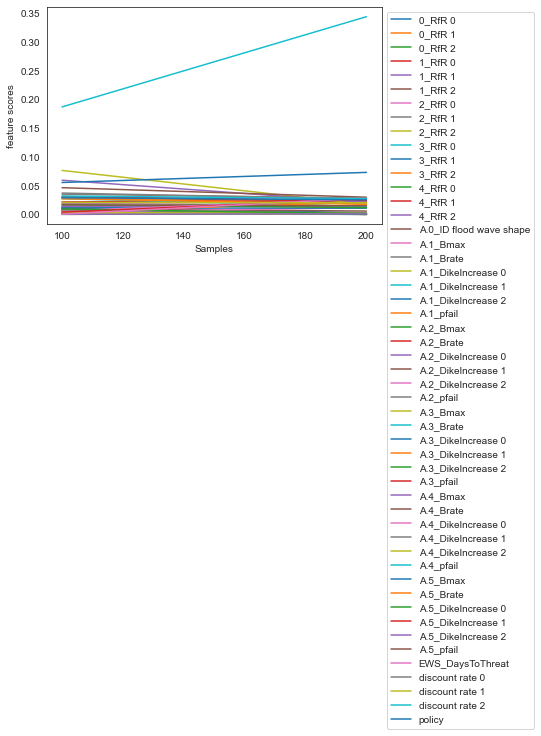

In [54]:
fig, ax = plt.subplots(1)

combined_scores.T.plot(ax=ax)
ax.legend(bbox_to_anchor=(1,1))
ax.set_xlabel('Samples')
ax.set_ylabel('feature scores')
plt.show()

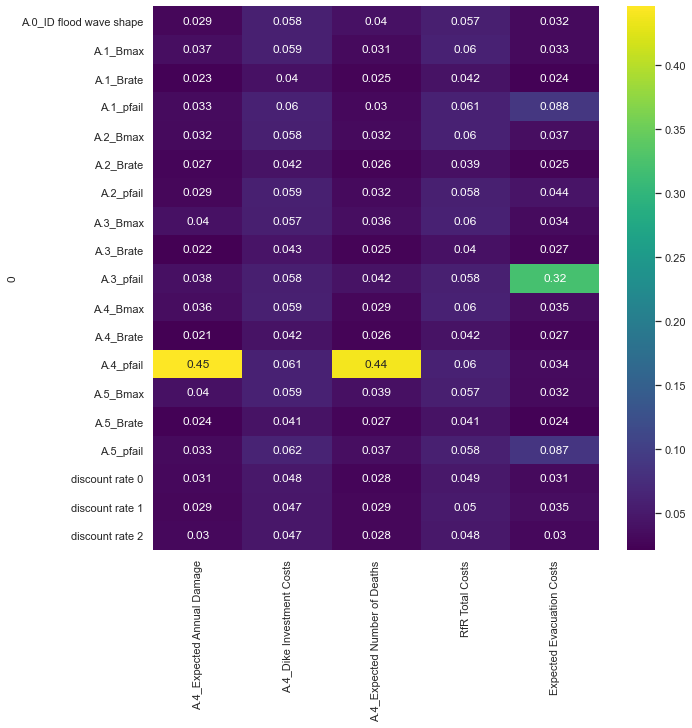

In [19]:
fs = feature_scoring.get_feature_scores_all(experiments_tree[experiment_columns], outcomes_tree[outcomes_of_interest])

sns.set(rc = {'figure.figsize':(10,10)})
svm=sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()
figure = svm.get_figure()    
figure.savefig('svm_conf.png', dpi=400, bbox_inches='tight')